## Classificação 1

In [1]:
# Dados
from sklearn.model_selection import train_test_split
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.naive_bayes import GaussianNB # 1. escolha da técnica
model = GaussianNB()                       # 2. instanciação do modelo
model.fit(Xtrain, ytrain)                  # 3. criação do modelo
y_model = model.predict(Xtest)             # 4. predição em novos dados

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Classificação 2

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

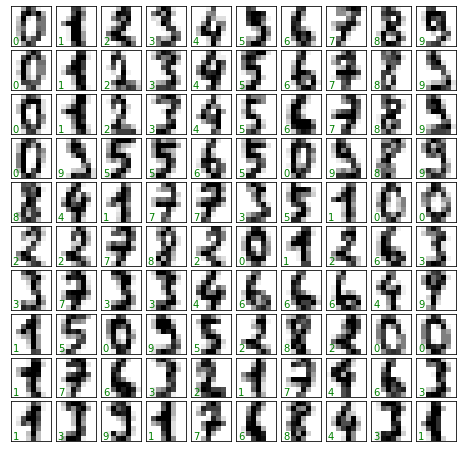

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [55]:
X = digits.data
X.shape

(1797, 64)

In [56]:
y = digits.target

In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

ACC TRAINING:0.8574610244988864
ACC TEST:0.8333333333333334


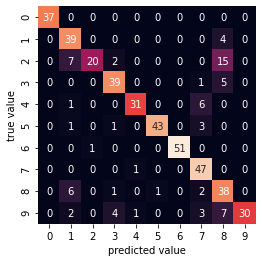

In [17]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Avaliação de Modelos e Hiper-parâmetros

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [20]:
model.fit(X, y)
y_model = model.predict(X)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [22]:
# criação do holdout: divide em treinamento e teste
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# criação do modelo sobre o conjunto de treinamento
model.fit(X1, y1)

# avaliação do modelo no conjunto de teste
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [25]:
#desempenho no treinamento e teste
y1_model = model.fit(X1, y1).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(1.0, 0.9066666666666666)

In [24]:
#usando cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target
# search for an optimal value of K for KNN

# varia o k de 1 a 30
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

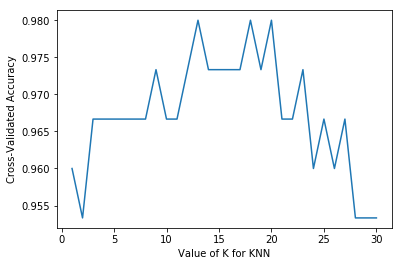

In [ ]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [26]:
#desempenho no treinamento e teste
model = KNeighborsClassifier(n_neighbors=13)
y1_model = model.fit(X1, y1).predict(X1)
y2_model = model.fit(X1, y1).predict(X2)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9333333333333333)

## Feature Engineering: one-hot enconding


In [27]:
import pandas as pd
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


In [28]:
houses['suburb'] = houses['suburb'].astype('category')
houses['suburb'] = houses['suburb'].cat.codes
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,5,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,50,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,17,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,46,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,31,Recife,Recife,Pernambuco,apart


In [29]:
#one-hot encoding
dfDummies = pd.get_dummies(houses['suburb'], prefix = 'suburb')
dfDummies.head()

,suburb_0,suburb_1,suburb_2,suburb_3,suburb_4,suburb_5,suburb_6,suburb_7,suburb_8,suburb_9,suburb_10,suburb_11,suburb_12,suburb_13,suburb_14,suburb_15,suburb_16,suburb_17,suburb_18,suburb_19,suburb_20,suburb_21,suburb_22,suburb_23,suburb_24,suburb_25,suburb_26,suburb_27,suburb_28,suburb_29,suburb_30,suburb_31,suburb_32,suburb_33,suburb_34,suburb_35,suburb_36,suburb_37,suburb_38,suburb_39,suburb_40,suburb_41,suburb_42,suburb_43,suburb_44,suburb_45,suburb_46,suburb_47,suburb_48,suburb_49,suburb_50,suburb_51,suburb_52,suburb_53,suburb_54,suburb_55,suburb_56,suburb_57
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
houses = pd.concat([houses, dfDummies], axis=1)
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,suburb_0,suburb_1,suburb_2,suburb_3,suburb_4,suburb_5,suburb_6,suburb_7,suburb_8,suburb_9,suburb_10,suburb_11,suburb_12,suburb_13,suburb_14,suburb_15,suburb_16,suburb_17,suburb_18,suburb_19,suburb_20,suburb_21,suburb_22,suburb_23,suburb_24,suburb_25,suburb_26,suburb_27,suburb_28,suburb_29,suburb_30,suburb_31,suburb_32,suburb_33,suburb_34,suburb_35,suburb_36,suburb_37,suburb_38,suburb_39,suburb_40,suburb_41,suburb_42,suburb_43,suburb_44,suburb_45,suburb_46,suburb_47,suburb_48,suburb_49,suburb_50,suburb_51,suburb_52,suburb_53,suburb_54,suburb_55,suburb_56,suburb_57
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,5,Recife,Recife,Pernambuco,apart,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,50,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,17,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,46,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,31,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
houses = houses.drop('suburb', 1)
houses.head()


,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,district,city,state,type,suburb_0,suburb_1,suburb_2,suburb_3,suburb_4,suburb_5,suburb_6,suburb_7,suburb_8,suburb_9,suburb_10,suburb_11,suburb_12,suburb_13,suburb_14,suburb_15,suburb_16,suburb_17,suburb_18,suburb_19,suburb_20,suburb_21,suburb_22,suburb_23,suburb_24,suburb_25,suburb_26,suburb_27,suburb_28,suburb_29,suburb_30,suburb_31,suburb_32,suburb_33,suburb_34,suburb_35,suburb_36,suburb_37,suburb_38,suburb_39,suburb_40,suburb_41,suburb_42,suburb_43,suburb_44,suburb_45,suburb_46,suburb_47,suburb_48,suburb_49,suburb_50,suburb_51,suburb_52,suburb_53,suburb_54,suburb_55,suburb_56,suburb_57
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Recife,Recife,Pernambuco,apart,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Recife,Recife,Pernambuco,apart,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Random Forest

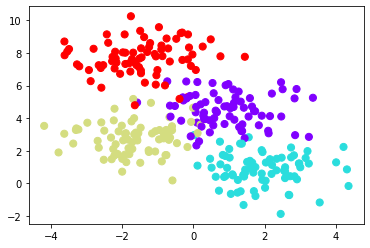

In [36]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [37]:
# Criando o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [38]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


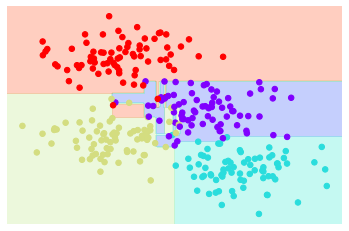

In [39]:
import numpy as np
visualize_classifier(DecisionTreeClassifier(), X, y)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [41]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, ypred)))

ACC TRAINING:1.0
ACC TEST:0.98


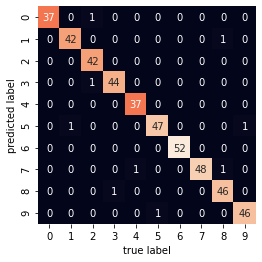

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [60]:
# Classificando dígitos com RF
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [61]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, ypred)))

ACC TRAINING:1.0
ACC TEST:0.9777777777777777


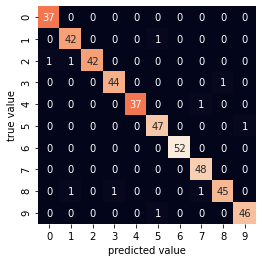

In [62]:
mat = confusion_matrix(ytest, ypred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');